In [1]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification,make_moons
from matplotlib import pyplot as plt
import time
import sys,os
np.random.seed(42)

In [2]:
def dataset(difficulty,n):
    
    if difficulty=='easy':
        centers = [-np.ones(2), np.ones(2)]

        X, y = make_blobs(n_samples=n, n_features=2, cluster_std=1.4,
                      centers=centers, shuffle=True)

        Xtest, ytest = make_blobs(n_samples=1000, n_features=2, cluster_std=1.4,
                      centers=centers, shuffle=True)
        return X,y,Xtest,ytest
    else:
        X, y = make_moons(n_samples=n+1000,noise=0.4)
        Xtest=X[-1000:]
        ytest=y[-1000:]
        X=X[:-1000]
        y=y[:-1000]
        return X,y,Xtest,ytest

In [3]:
X,y,Xtest,ytest=dataset('easy',300)

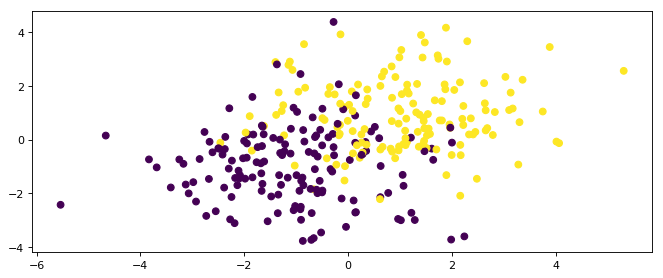

In [4]:
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

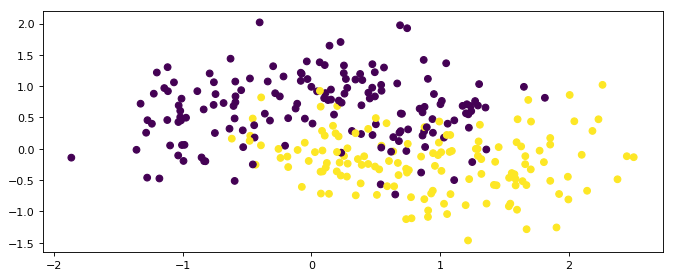

In [5]:
X,y,Xtest,ytest=dataset('hard',300)
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [6]:
from linear_model_MOM import logregMOM_binary
from test_linear_model_MOM import logregMOM_binary1b

### Test rate of convergence with Monte Carlo estimation of the 0-1 risk.

### First test with logistic regression to validate the method

In [7]:
from sklearn.linear_model import LogisticRegression

def eval(n,difficulty):
    X,y,Xtest,ytest=dataset(difficulty,n)
    clf=LogisticRegression()
    clf.fit(X,y)
    return np.mean(ytest!=clf.predict(Xtest))

def montecarlo(M,n,difficulty):
    print('\r',n,end='')
    res=0
    for f in range(M):
        res+=eval(n,difficulty)
    return res/M

In [8]:
#Easy case : explicit formula for optimal risk
from scipy.stats import norm
ropt_easy=norm.cdf(-2/(np.sqrt(2)*1.4))

In [9]:
ropt_easy

0.15621110562134671

In [10]:
M=500
xplot=np.array([int (n) for n in np.logspace(1.5,2.3,num=50)])
resultats=[]
for n in xplot :
    resultats+=[montecarlo(M,n,'easy')]

 199

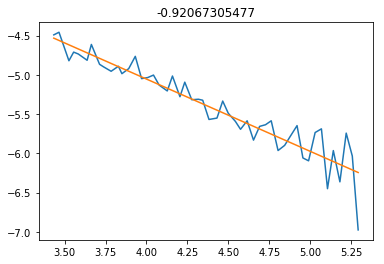

In [11]:
res=np.abs(resultats-ropt_easy)
plt.plot(np.log(xplot),np.log(np.array(res)))
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.log(xplot.reshape([len(xplot),1])),np.log(res))
yplot=lr.predict(np.log(xplot.reshape([len(xplot),1])))
plt.plot(np.log(xplot),yplot)
plt.title(lr.coef_[0])
plt.show()

In [12]:
M=500

xplot=np.array([int (n) for n in np.logspace(1.5,2.3,num=50)])
resultats=[]
for n in xplot :
    resultats+=[montecarlo(M,n,"hard")]

 199

In [13]:
#Hard case, no formula. Approximation by taking n large.
X,y,Xtest,ytest=dataset('hard',10000000)
lr=LogisticRegression(max_iter=1000)
lr.fit(X,y)
print(lr.coef_,lr.intercept_)

[[ 1.26321911 -2.81034104]] [ 0.07158338]


In [14]:
ropt_hard=np.mean(lr.predict(Xtest)!=ytest)

In [15]:
ropt_hard

0.16500000000000001

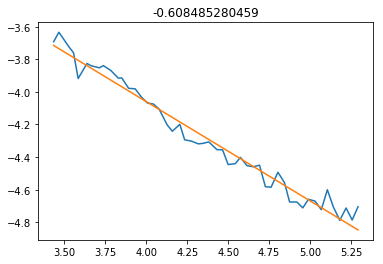

In [16]:
res=np.abs(np.array(resultats)-ropt_hard)
plt.plot(np.log(xplot),np.log(np.array(res)))
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.log(xplot.reshape([len(xplot),1])),np.log(res))
yplot=lr.predict(np.log(xplot.reshape([len(xplot),1])))
plt.plot(np.log(xplot),yplot)
plt.title(lr.coef_[0])
plt.show()

### Test MOM : utilisation of a dataset without outliers and with K constant

In [17]:

def eval(n,centers):
    X,y,Xtest,ytest=dataset(centers,n)
    clf=logregMOM_binary(None,K=3,eta0=30,beta=0.1,agg=1,epoch=200)
    clf.fit(X,y)
    return np.mean(ytest!=clf.predict(Xtest))

def montecarlo(M,n,centers):
    print('\r',n,end='')
    res=0
    for f in range(M):
        res+=eval(n,centers)
    return res/M

In [18]:
#Easy case : explicit formula for optimal risk
from scipy.stats import norm
ropt_easy=norm.cdf(-2/(np.sqrt(2)*1.4))

In [19]:
ropt_easy

0.15621110562134671

In [20]:
M=500
xplot=np.array([int (n) for n in np.logspace(1.5,2.3,num=50)])
resultats=[]
for n in xplot :
    resultats+=[montecarlo(M,n,'easy')]

 199

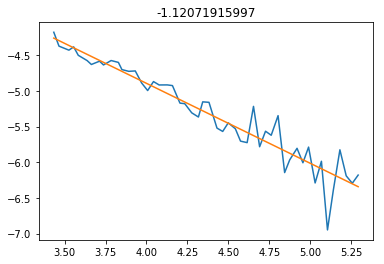

In [21]:
res=np.abs(resultats-ropt_easy)
plt.plot(np.log(xplot),np.log(np.array(res)))
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.log(xplot.reshape([len(xplot),1])),np.log(res))
yplot=lr.predict(np.log(xplot.reshape([len(xplot),1])))
plt.plot(np.log(xplot),yplot)
plt.title(lr.coef_[0])
plt.show()

In [22]:
M=500

xplot=np.array([int (n) for n in np.logspace(1.5,2.3,num=50)])
resultats=[]
for n in xplot :
    resultats+=[montecarlo(M,n,"hard")]

 199

In [23]:
#Hard case, no formula. Approximation by taking n large.
X,y,Xtest,ytest=dataset('hard',10000000)
lr=LogisticRegression(max_iter=1000)
lr.fit(X,y)
print(lr.coef_,lr.intercept_)

[[ 1.26313451 -2.80948333]] [ 0.07127904]


In [24]:
ropt_hard=np.mean(lr.predict(Xtest)!=ytest)

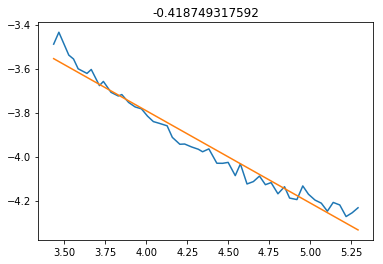

In [25]:
res=np.abs(np.array(resultats)-ropt_hard)
plt.plot(np.log(xplot),np.log(np.array(res)))
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.log(xplot.reshape([len(xplot),1])),np.log(res))
yplot=lr.predict(np.log(xplot.reshape([len(xplot),1])))
plt.plot(np.log(xplot),yplot)
plt.title(lr.coef_[0])
plt.show()

In [26]:
### Test with one block for all iterations

In [29]:

def eval(n,centers):
    X,y,Xtest,ytest=dataset(centers,n)
    clf=logregMOM_binary1b(None,K=3,eta0=30,beta=0.1,agg=1,epoch=200)
    clf.fit(X,y)
    return np.mean(ytest!=clf.predict(Xtest))

def montecarlo(M,n,centers):
    print('\r',n,end='')
    res=0
    for f in range(M):
        res+=eval(n,centers)
    return res/M

In [30]:
M=500

xplot=np.array([int (n) for n in np.logspace(1.5,2.3,num=50)])
resultats=[]
for n in xplot :
    resultats+=[montecarlo(M,n,"hard")]

 199

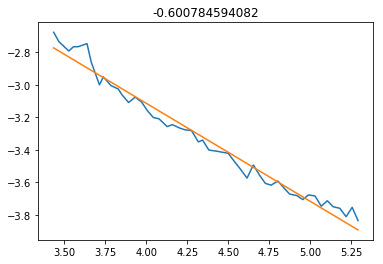

In [31]:
res=np.abs(resultats-ropt_easy)
plt.plot(np.log(xplot),np.log(np.array(res)))
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.log(xplot.reshape([len(xplot),1])),np.log(res))
yplot=lr.predict(np.log(xplot.reshape([len(xplot),1])))
plt.plot(np.log(xplot),yplot)
plt.title(lr.coef_[0])
plt.show()